https://www.developer.vic.gov.au

https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-past-hour-counts-per-minute/api/

https://data.melbourne.vic.gov.au/api/explore/v2.1/console

In [1]:
import os
from io import BytesIO
import json
import requests
from dotenv import load_dotenv

import geopandas as gpd
import hvplot.pandas as hv

In [2]:
load_dotenv()

api = os.environ.get('DATA_VIC_API')

In [3]:
api_url = 'https://wovg-community.gateway.prod.api.vic.gov.au/datavic/opendata/v1.1/datasets'

dataset = 'tree-canopies-2018-entire-municipal-area-urban-forest'

dataset_url = f'{api_url}/{dataset}'

headers = {
    'apikey': api
}

response = requests.get(dataset_url, headers=headers)
print(response)

<Response [200]>


In [4]:
response_json = response.json() 

print(json.dumps(response_json, indent=2))

{
  "_meta": {
    "processing_time": 142
  },
  "_links": [
    {
      "rel": "self",
      "href": "/datavic/opendata/v1.1/datasets/086878ec-34ff-489b-85ca-7104ee8a1d16"
    }
  ],
  "name": "tree-canopies-2018-entire-municipal-area-urban-forest",
  "license_title": "other-open",
  "id": "086878ec-34ff-489b-85ca-7104ee8a1d16",
  "metadata_created": "2023-03-07T22:17:09.795496",
  "metadata_modified": "2024-06-13T16:45:27.937656",
  "title": "Tree canopies 2018 entire municipal area (Urban Forest)",
  "tags": [
    "canopy",
    "environment",
    "green",
    "greening",
    "sustainability",
    "tree",
    "vegetation"
  ],
  "_embedded": {
    "count": 6,
    "resources": [
      {
        "name": "Tree canopies 2018 entire municipal area (Urban Forest) CSV",
        "format": "CSV",
        "id": "06ff6341-7b0c-4aa1-bb18-577020bd9192",
        "date_created": "2024-02-07T21:52:04.952437",
        "_links": [
          {
            "rel": "self",
            "href": "/datavic/op

In [5]:
print(response_json['name'])
print(response_json['id'])
print(response_json['tags'])
print(json.dumps(response_json['_embedded']['resources'][2], indent=4))

tree-canopies-2018-entire-municipal-area-urban-forest
086878ec-34ff-489b-85ca-7104ee8a1d16
['canopy', 'environment', 'green', 'greening', 'sustainability', 'tree', 'vegetation']
{
    "name": "Tree canopies 2018 entire municipal area (Urban Forest) GEOJSON",
    "format": "GeoJSON",
    "id": "e564e421-bb4e-4ab5-bf41-dd3d63984b24",
    "date_created": "2024-02-07T21:52:04.952444",
    "_links": [
        {
            "rel": "self",
            "href": "/datavic/opendata/v1.1/resources?name=Tree+canopies+2018+entire+municipal+area+%28Urban+Forest%29+GEOJSON&format=GeoJSON"
        },
        {
            "rel": "download",
            "href": "https://data.melbourne.vic.gov.au/api/v2/catalog/datasets/tree-canopies-2018-entire-municipal-area-urban-forest/exports/geojson"
        }
    ]
}


In [6]:
geojson_url = response_json['_embedded']['resources'][2]['_links'][0]['href']

geojson_url = geojson_url + '?limit=2'

print(geojson_url)

/datavic/opendata/v1.1/resources?name=Tree+canopies+2018+entire+municipal+area+%28Urban+Forest%29+GEOJSON&format=GeoJSON?limit=2


<Axes: >

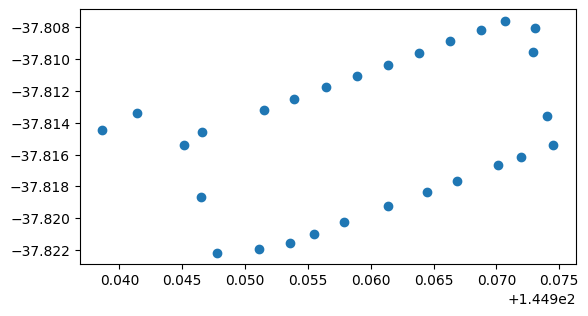

In [7]:
gdf = gpd.read_file('https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-circle-tram-stops/exports/geojson?epsg=4326')

gdf.plot()

In [12]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
map = gdf.hvplot(geo=True,tiles='OSM', color='red', height=600, width=800)

map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]